In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
def dihotomi(f, left_border, right_border, eps):
    iters = 0
    delta = eps / 4
    while right_border - left_border > eps:
        iters += 2
        mid = (left_border + right_border) / 2
        x1 = mid - delta
        x2 = mid + delta
        f1 = f(x1)
        f2 = f(x2)
        if f1 < f2:
            right_border = x2
        elif f1 > f2:
            left_border = x1
        else:
            return mid, iters
    return (left_border + right_border) / 2, iters


def gold_sech(f, left_border, right_border, eps):
    iters = 2
    phi1 = (3 - 5 ** 0.5) / 2
    x1 = left_border + (right_border - left_border) * phi1
    x2 = right_border - (right_border - left_border) * phi1
    f1 = f(x1)
    f2 = f(x2)
    while right_border - left_border > eps:
        iters += 1
        if f1 <= f2:
            right_border = x2
            x2 = x1
            f2 = f1
            x1 = left_border + (right_border - left_border) * phi1
            f1 = f(x1)
        elif f1 > f2:
            left_border = x1
            x1 = x2
            f1 = f2
            x2 = right_border - (right_border - left_border) * phi1
            f2 = f(x2)
    
    return (left_border + right_border) / 2, iters

def fibbonachi(f, left_border, right_border, n):
    fibs = [1,1]
    while (len(fibs) < n + 3) :
        fibs.append(fibs[-1] + fibs[-2])
    
    x1 = left_border + (fibs[n - 2] / fibs[n]) * (right_border - left_border) 
    x2 = left_border + (fibs[n - 1] / fibs[n]) * (right_border - left_border)
    f1 = f(x1)
    f2 = f(x2)
    
    iters = n - 2
    while iters != 0:
        iters -= 1
        if f1 < f2:
            right_border = x2
            x2 = x1
            f2 = f1
            x1 = left_border + (fibs[n - 2] / fibs[n]) * (right_border - left_border)
            f1 = f(x1)
        elif f1 > f2:
            left_border = x1
            x1 = x2
            f1 = f2
            x2 = left_border + (fibs[n - 1] / fibs[n]) * (right_border - left_border)
            f2 = f(x2)
        else:
            return (left_border + right_border) / 2, right_border - left_border

    return (left_border + right_border) / 2, right_border - left_border
    

In [3]:
def make_plots_with_eps(method, f, left_border, right_border):    
    e_s = [10**i for i in range(-10, 2)]
    
    answers = []
    iters = []
    
    for e in e_s:
        answer, param = method(f, left_border, right_border, e)
        answers.append(answer)
        iters.append(param)
        
    
    plt.title('Number of calculations and eps')
    plt.xlabel('eps')
    plt.ylabel('Number of calculations')
    plt.semilogx(e_s, iters)
    plt.show()
    
    plt.title('Answer and eps')
    plt.xlabel('eps')
    plt.ylabel('answer')
    plt.semilogx(e_s, answers)
    plt.show()

def make_plots_with_n(method, f, left_border, right_border):
    n_s = [i for i in range(10, 110, 10)]
    
    answers = []
    iters = []
    
    for n in n_s:
        answer, param = method(f, left_border, right_border, n)
        answers.append(answer)
        iters.append(param)
        
    
    plt.title('Number of calculations and n')
    plt.xlabel('n')
    plt.ylabel('Number of calculations')
    plt.semilogx(iters, n_s)
    plt.show()
    
    plt.title('Answer and eps')
    plt.xlabel('eps')
    plt.ylabel('answer')
    plt.semilogx(iters, answers)
    plt.show()

In [4]:
def func(x):
    return x ** 2 + abs((math.e ** x) - 1)

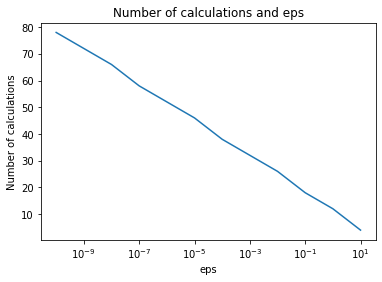

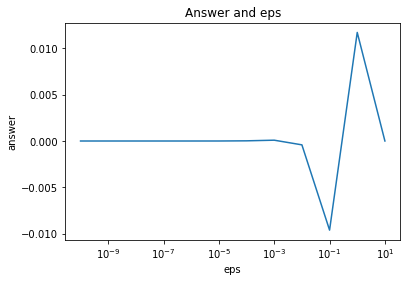

In [5]:
make_plots_with_eps(dihotomi, func, -10, +15)

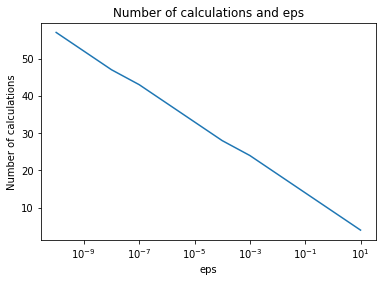

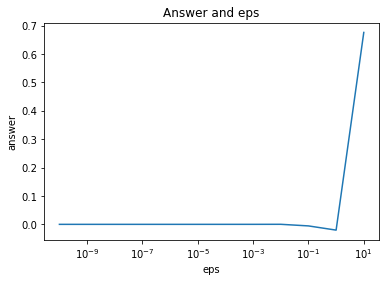

In [6]:
make_plots_with_eps(gold_sech, func, -10, +15)

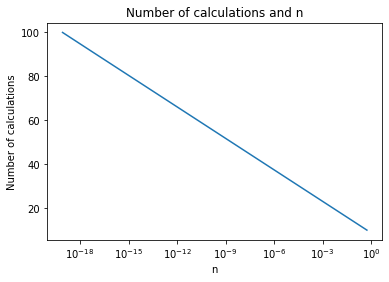

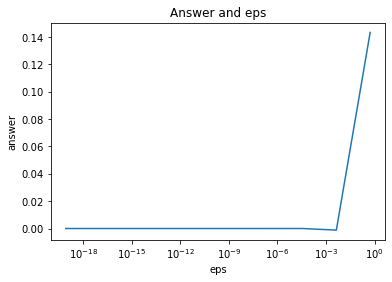

In [7]:
make_plots_with_n(fibbonachi, func, -10, +15)